In [1]:
# Some graphic and calculation for manuscripts/ not important
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

rootPath = '../../'
dataPath = rootPath + 'data_preparation/biomarkers_acute_sample_462/'

dataFile373 = dataPath + 'master_acute_sample_462_X7_helsinki.xlsx'

GOSEFile = rootPath + 'data/_neurobot_outcome_GOSE_scores.csv'

In [2]:
df_data = pd.read_excel(dataFile373, sheet_name='GFAP', header=0, index_col=0)
dfGOSE = pd.read_csv(GOSEFile, header=0 )
dfGOSE = dfGOSE.iloc[:, [0, -3, -2, -1]].drop_duplicates()
dfGOSE.set_index('subjectId', inplace=True)
dfGOSE.replace('2_or_3', 3, inplace=True)
dfGOSE = dfGOSE.apply(pd.to_numeric, errors='coerce')
# outcome['GOSE3month'] = dfGOSE['Subject.GOSE3monthEndpointDerived']
df_data['GOSE6month'] = dfGOSE['Subject.GOSE6monthEndpointDerived']
# outcome['GOSE12month'] = dfGOSE['Subject.GOSE12monthEndpointDerived']

df = df_data[['Age', 'Sex', 'GCS', 'GOSE6month']]
df.head()

,Age,Sex,GCS,GOSE6month
subjectId,,,,
9Ydj395,69,1,8.0,5.0
6ban548,56,1,14.0,5.0
4uVH383,83,0,9.0,1.0
6shy992,20,1,3.0,6.0
8shS592,59,1,15.0,5.0


In [3]:
# Age and Sex bar chart
# Define colors
male_color = '#7070FF'
female_color = '#FF7070'

# Define age bins and labels
bins = [0, 17, 35, 65, 100]  # assuming Age values range between 0 and 100
labels = ['Under 18', '18-35', '35-65', 'Over 65']

# Create a new column 'age_group' using pd.cut
df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

# Map Sex values from numeric to readable labels (optional)
df['Sex'] = df['Sex'].map({1: 'Male', 0: 'Female'})

# Group by age_group and Sex to count occurrences
group_counts = df.groupby(['age_group', 'Sex']).size().reset_index(name='count')

C:\Users\thanh\AppData\Local\Temp\ipykernel_12756\3754265374.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)
C:\Users\thanh\AppData\Local\Temp\ipykernel_12756\3754265374.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'] = df['Sex'].map({1: 'Male', 0: 'Female'})
C:\Users\thanh\AppData\Local\Temp\ipykernel_12756\3754265374.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in 

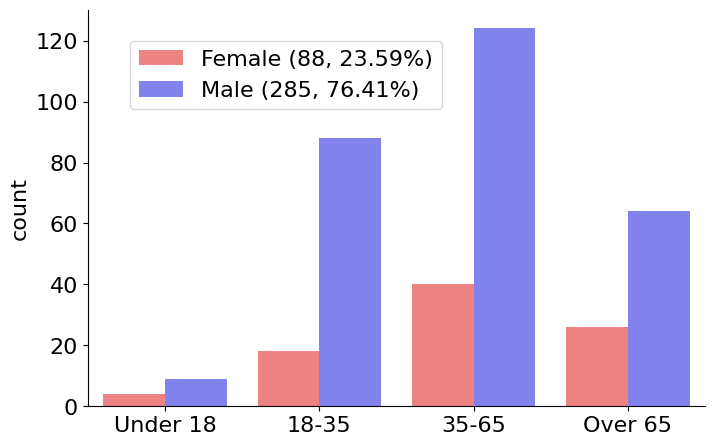

In [7]:
plt.rcParams.update({'font.size': 16})
# Use seaborn to create a bar chart
g = sns.catplot(
    data=group_counts, 
    x='age_group', 
    y='count', 
    hue='Sex', 
    kind='bar', 
    palette={'Male': male_color, 'Female': female_color},
    height= 5,
    aspect=1.5,
)


# Remove the default legend (if present)
if g._legend:
    g._legend.remove()

# Compute total counts for each sex from the original DataFrame
totals = df['Sex'].value_counts()

# Get the current legend handles and labels
handles, labels = g.ax.get_legend_handles_labels()

# Create new labels with the total count, e.g., "Male (206)"
new_labels = [f"{label} ({totals[label]}, {(totals[label]/3.73):.2f}%)" for label in labels]

# Update the legend and place it inside the chart at the upper left corner
g.ax.legend(handles, new_labels, loc='upper left', bbox_to_anchor=(0.05, 0.95))

# Set axis labels and title
# g.set_axis_labels("Age Group", "Count")
plt.xlabel('')
# plt.ylabel('Count')
# plt.title('Patient ages ranged from 3 to 92, with a median of 49.')
plt.show()

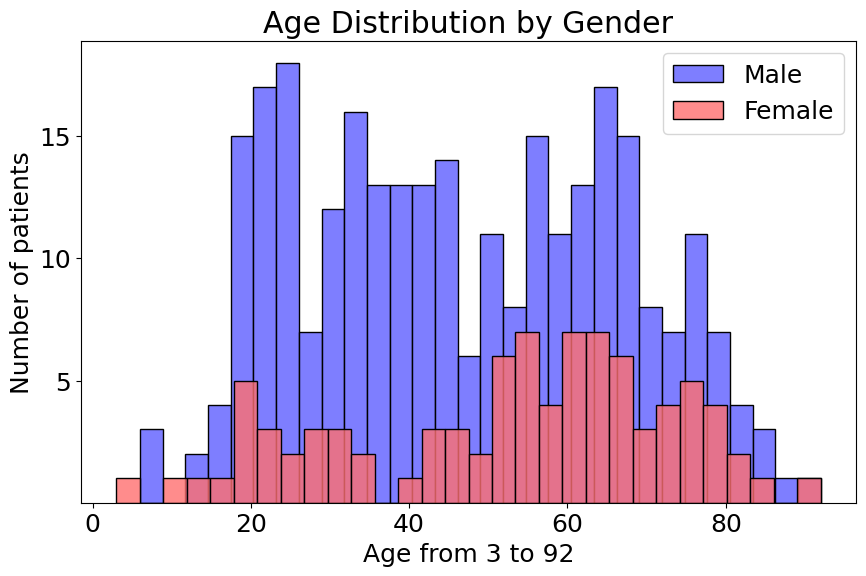

In [ ]:
# Define colors
male_color = '#7070FF'
female_color = '#FF7070'

# Age: -18, 19-35, 35-65, 65-
# Create histogram
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Sex'] == 1]['Age'], bins=30, color=male_color, label='Male', alpha=0.9)
sns.histplot(df[df['Sex'] == 0]['Age'], bins=30, color=female_color, label='Female', alpha=0.8)

# Labels and title
plt.rcParams.update({'font.size': 18})
plt.xlabel('Age from 3 to 92')
plt.ylabel('Number of patients')
# plt.title('Age Distribution by Gender')
plt.legend()
plt.yticks([5,10,15])

# Show plot
plt.show()

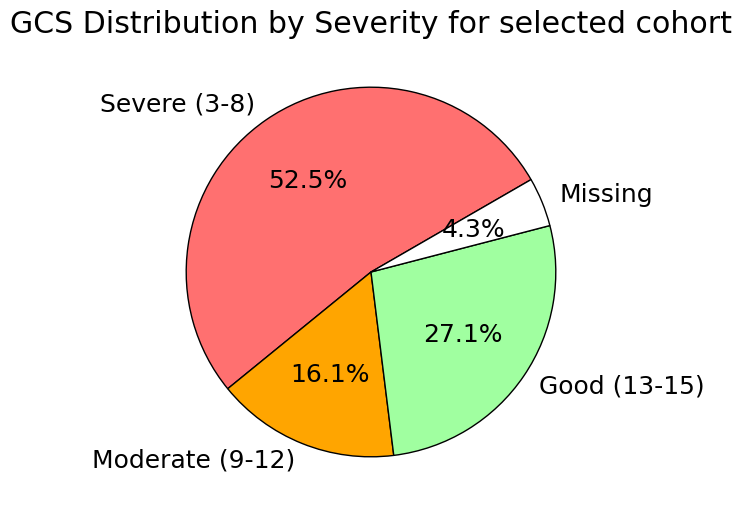

In [37]:
# Define GCS categories
gcs_labels = ['Severe (3-8)', 'Moderate (9-12)', 'Good (13-15)']
gcs_bins = [3, 8, 12, 15]  # Upper limits for each group
df['GCS_Category'] = pd.cut(df['GCS'], bins=[2, 8, 12, 15], labels=gcs_labels, right=True)

# Count occurrences of each category
gcs_counts = df['GCS_Category'].value_counts().reindex(gcs_labels)
missing_count = df['GCS'].isna().sum()
gcs_counts['Missing'] = missing_count
# Define colors
colors = ['#FF7070', '#FFA500', '#A0FFA0', 'white']

# Create pie chart
plt.figure(figsize=(6, 6))
plt.pie(gcs_counts, labels=gcs_counts.index, autopct='%1.1f%%', colors=colors, startangle=30, wedgeprops={'edgecolor': 'black'})

# Title
plt.title('GCS Distribution by Severity for selected cohort')

# Show plot
plt.show()